In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
dfMid = pd.read_excel('Средняя и коорды.xlsx', sheet_name='Лист1')
dfYear = pd.read_excel("Ежегодная.xlsx", sheet_name='Лист1')

In [ ]:
print(dfYear)

    станция  Ago-4  Baia Terra Nova  Baldrick Aws  Base Brown  \
0      2001    NaN            -14.6           NaN         NaN   
1      2002    NaN              NaN           NaN         NaN   
2      2003    NaN            -14.5           NaN         NaN   
3      2004    NaN            -13.8           NaN        -2.3   
4      2005    NaN              NaN           NaN        -3.5   
5      2006    NaN              NaN           NaN        -3.3   
6      2007    NaN              NaN           NaN        -2.1   
7      2008    NaN              NaN           NaN         1.2   
8      2009    NaN            -13.6           NaN        -2.9   
9      2010    NaN            -13.9           NaN        -4.8   
10     2011    NaN              NaN           NaN         NaN   
11     2012    NaN            -13.7         -39.2         NaN   
12     2013    NaN            -13.7         -37.3        -1.5   
13     2014    NaN            -13.4         -39.1        -2.3   
14     2015    NaN       

ПЕРЕНЕСТИ ВСЮ ТЕМПЕРАТУРУ ДО 2020

In [ ]:
# y = df["средняя температура"]
# df = df.drop(["средняя температура"], axis = 1)

name = dfMid["Название Станции"]
dfMid = dfMid.drop(["Название Станции"], axis = 1)


dfYear.fillna(dfYear.mean(), inplace=True)  # Замена NaN на среднее значение по каждому столбцу

# Транспонирование данных и установка годов в качестве индекса
dfYear = dfYear.T
dfYear.columns = dfYear.iloc[0]  # Сделать верхнюю строку с названиями станций заголовками
dfYear = dfYear[1:]  # Пропустить первую строку (годы)
dfYear = dfYear.astype(float)  # Преобразовать значения в числа, если необходимо
y = dfYear[2022.0]
dfYear = dfYear.drop([2022.0], axis = 1)


In [ ]:
print(dfYear)

    станция  Ago-4  Baia Terra Nova  Baldrick Aws  Base Brown  \
0      2001    NaN            -14.6           NaN         NaN   
1      2002    NaN              NaN           NaN         NaN   
2      2003    NaN            -14.5           NaN         NaN   
3      2004    NaN            -13.8           NaN        -2.3   
4      2005    NaN              NaN           NaN        -3.5   
5      2006    NaN              NaN           NaN        -3.3   
6      2007    NaN              NaN           NaN        -2.1   
7      2008    NaN              NaN           NaN         1.2   
8      2009    NaN            -13.6           NaN        -2.9   
9      2010    NaN            -13.9           NaN        -4.8   
10     2011    NaN              NaN           NaN         NaN   
11     2012    NaN            -13.7         -39.2         NaN   
12     2013    NaN            -13.7         -37.3        -1.5   
13     2014    NaN            -13.4         -39.1        -2.3   
14     2015    NaN       

In [ ]:
from sklearn.cluster import KMeans

# Выберите количество кластеров
num_clusters = 4  # Здесь вы можете выбрать желаемое количество кластеров

# Создайте объект модели K-средних
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Выполните кластеризацию на координатах станций
cluster_labels = kmeans.fit_predict(dfMid[['Широта', 'Долгота', "Высота над уровнем моря", "средняя температура"]])

# Добавьте метки кластеров в ваш DataFrame
dfMid['Cluster'] = cluster_labels

print(dfMid)

              станция  Широта  Долгота  Высота над уровнем моря  \
0               Ago-4  -82.02    96.77                     3565   
1     Baia Terra Nova  -74.70   164.10                       91   
2        Baldrick Aws  -82.77   -13.05                     1968   
3          Base Brown  -64.88   -62.88                        1   
4   Base Roi Baudouin  -70.40    24.30                        0   
..                ...     ...      ...                      ...   
91         Молодежная  -67.66    45.85                       50   
92             Моусон  -67.60    62.87                       16   
93           Мыс Берд  -77.22   166.43                       70   
94        Мыс Пембрук  -51.70   -57.70                       16   
95    Новолазаревская  -70.77    11.83                      122   

    средняя температура  Cluster  
0                 -52.6        0  
1                 -14.1        1  
2                 -38.0        2  
3                  -2.6        1  
4                 -1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
train_data, val_data, train_y, val_y = train_test_split(dfYear, y, test_size = 0.3)
scaler = StandardScaler().fit(train_data)
standardized_X = scaler.transform(train_data)
print(standardized_X)

In [6]:
%pip install catboost
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/251.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/251.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/251.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/251.3 kB 325.1 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/251.3 kB 469.7 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/251.3 kB 984.6 kB/s eta 0:00:01
   ---------------------------------------- 251.3/251.3 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from catboost import CatBoostRegressor, Pool
cat = CatBoostRegressor(iterations=150, depth=3, learning_rate=0.1, loss_function='RMSE', l2_leaf_reg=5, border_count=32, verbose=0)


In [ ]:
# Преобразование данных в catboost.Pool
train_pool = Pool(train_data, label=train_y)
val_pool = Pool(val_data, label=val_y)
cat.fit(train_data, train_y)
predictions = cat.predict(train_data)
print("Предсказанные значения на обучающих данных:")
print(predictions)
print("Реальные значения на обучающих данных:")
print(train_y)

predictions = cat.predict(val_data)
print("Предсказанные значения на валидационных данных:")
print(predictions)
print("Реальные значения на валидационных данных:")
print(val_y)

ОТСЮДА НАЧИНАЕТСЯ НОРМ КОД

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor

# Разделение данных
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data, val_data, train_y, val_y = train_test_split(merged_df.drop(2022.0, axis=1), merged_df[2022.0], test_size=0.3, random_state=42)
train_data.columns = train_data.columns.astype(str)
val_data.columns = val_data.columns.astype(str)


# Создание моделей
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Cat Boosting': CatBoostRegressor(iterations=150, depth=3, learning_rate=0.1, loss_function='RMSE', l2_leaf_reg=5, border_count=32, verbose=0)
}


# Обучение моделей и оценка производительности
for name, model in models.items():
    model.fit(train_data, train_y)
    y_pred = model.predict(val_data)
    mse = mean_squared_error(val_y, y_pred)
    print(f"{name}: Mean Squared Error = {mse}")


Linear Regression: Mean Squared Error = 1.3630357101789228
Random Forest: Mean Squared Error = 3.085484722542219
Gradient Boosting: Mean Squared Error = 2.892089087130996
Cat Boosting: Mean Squared Error = 3.3231073246029634


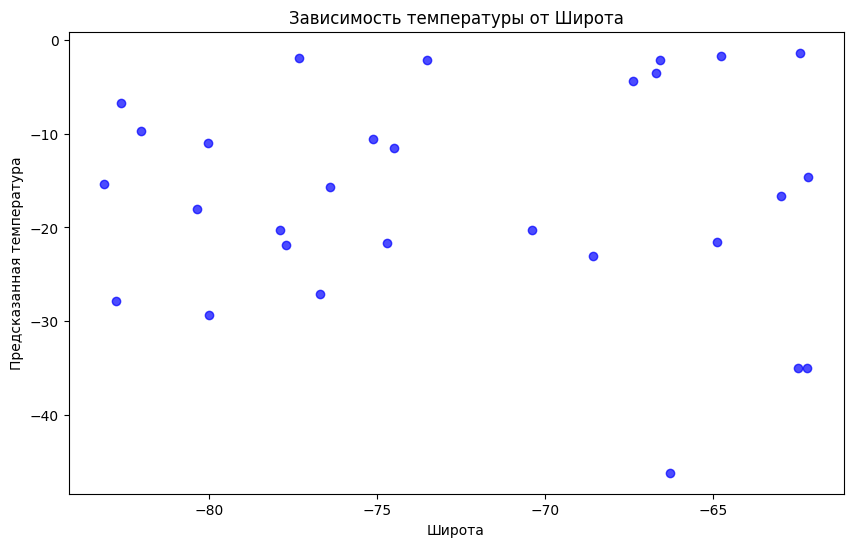

In [ ]:
import matplotlib.pyplot as plt

# Выбор параметра для построения графика
selected_parameter = 'Широта'

# Получение реальных значений и предсказанных значений для выбранного параметра
real_values = dfMid[selected_parameter][:len(predictions)]  # Убедимся, что размеры совпадают
predicted_values = predictions

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(real_values, predicted_values, color='blue', alpha=0.7)
plt.title(f'Зависимость температуры от {selected_parameter}')
plt.xlabel(selected_parameter)
plt.ylabel('Предсказанная температура')
plt.show()



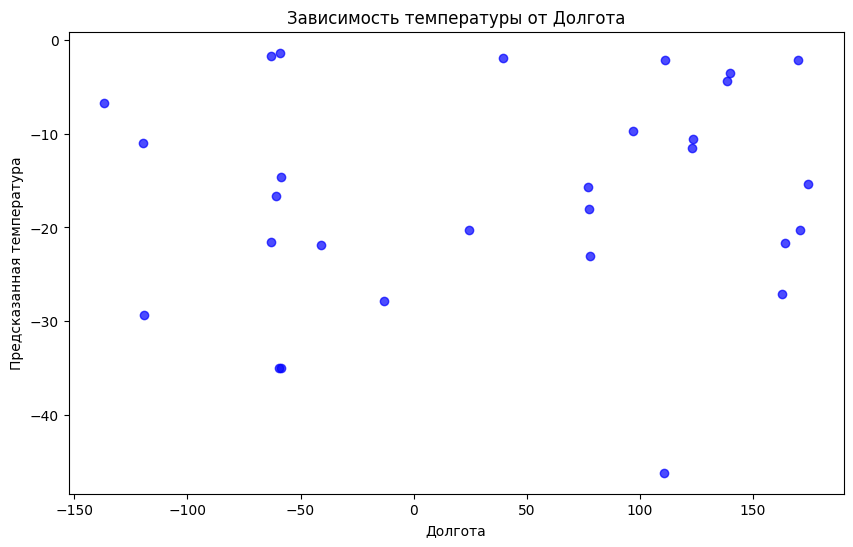

In [ ]:
import matplotlib.pyplot as plt

# Выбор параметра для построения графика
selected_parameter = 'Долгота'

# Получение реальных значений и предсказанных значений для выбранного параметра
real_values = dfMid[selected_parameter][:len(predictions)]  # Убедимся, что размеры совпадают
predicted_values = predictions

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(real_values, predicted_values, color='blue', alpha=0.7)
plt.title(f'Зависимость температуры от {selected_parameter}')
plt.xlabel(selected_parameter)
plt.ylabel('Предсказанная температура')
plt.show()


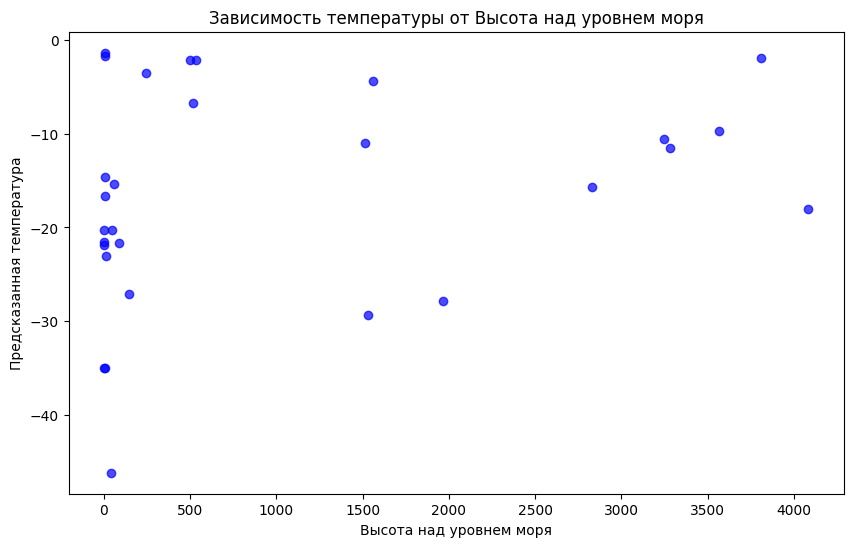

In [ ]:
import matplotlib.pyplot as plt

# Выбор параметра для построения графика
selected_parameter = 'Высота над уровнем моря'

# Получение реальных значений и предсказанных значений для выбранного параметра
real_values = dfMid[selected_parameter][:len(predictions)]  # Убедимся, что размеры совпадают
predicted_values = predictions

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(real_values, predicted_values, color='blue', alpha=0.7)
plt.title(f'Зависимость температуры от {selected_parameter}')
plt.xlabel(selected_parameter)
plt.ylabel('Предсказанная температура')
plt.show()


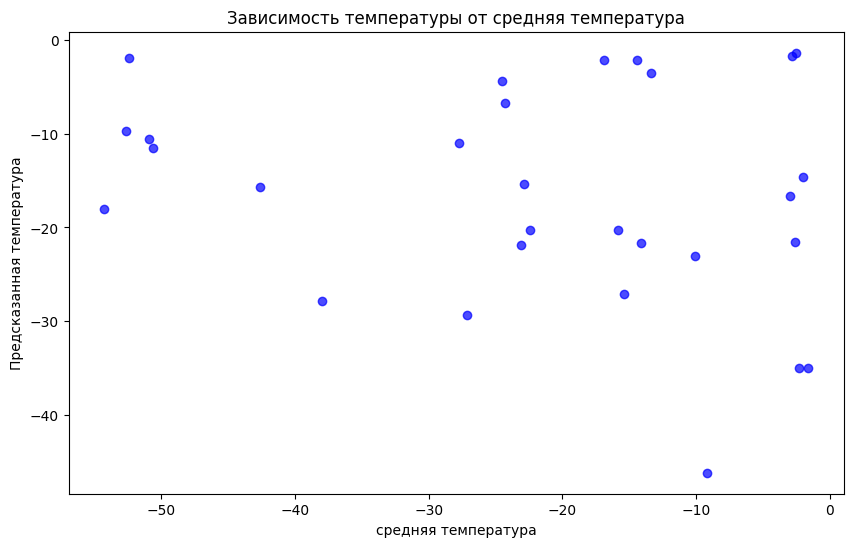

In [ ]:
import matplotlib.pyplot as plt

# Выбор параметра для построения графика
selected_parameter = 'средняя температура'

# Получение реальных значений и предсказанных значений для выбранного параметра
real_values = dfMid[selected_parameter][:len(predictions)]  # Убедимся, что размеры совпадают
predicted_values = predictions

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(real_values, predicted_values, color='blue', alpha=0.7)
plt.title(f'Зависимость температуры от {selected_parameter}')
plt.xlabel(selected_parameter)
plt.ylabel('Предсказанная температура')
plt.show()


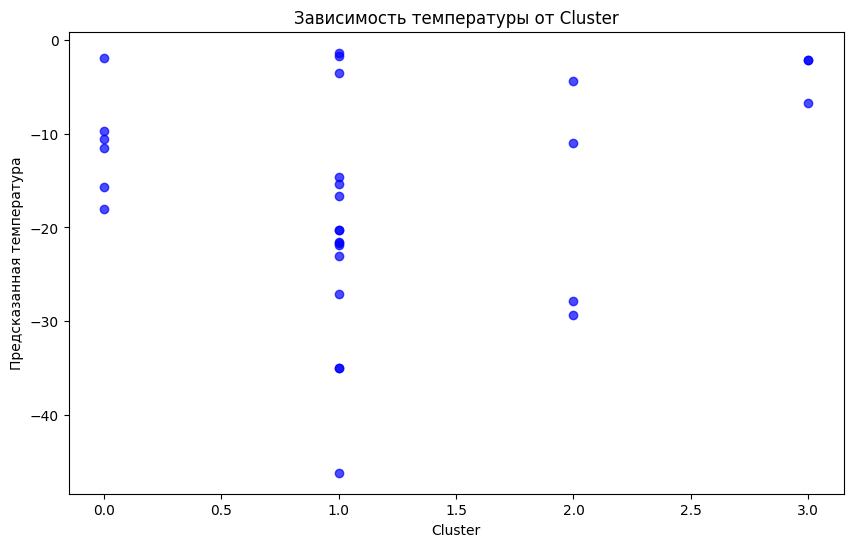

In [ ]:
import matplotlib.pyplot as plt

# Выбор параметра для построения графика
selected_parameter = 'Cluster'

# Получение реальных значений и предсказанных значений для выбранного параметра
real_values = dfMid[selected_parameter][:len(predictions)]  # Убедимся, что размеры совпадают
predicted_values = predictions

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(real_values, predicted_values, color='blue', alpha=0.7)
plt.title(f'Зависимость температуры от {selected_parameter}')
plt.xlabel(selected_parameter)
plt.ylabel('Предсказанная температура')
plt.show()


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from catboost import CatBoostRegressor, Pool

# Загрузка данных о средней температуре и координатах станций
dfMid = pd.read_excel('Средняя и коорды.xlsx', sheet_name='Лист1')
dfYear = pd.read_excel("Ежегодная.xlsx", sheet_name='Лист1')

# Заполнение пропущенных значений в данных о ежегодной температуре средними
dfYear.fillna(dfYear.mean(), inplace=True)

# Транспонирование данных и установка годов в качестве индекса
dfYear = dfYear.T
dfYear.columns = dfYear.iloc[0]
dfYear = dfYear[1:]
dfYear = dfYear.astype(float)

# Создание модели K-средних
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Кластеризация на координатах станций
cluster_labels = kmeans.fit_predict(dfMid[['Широта', 'Долгота', 'Высота над уровнем моря', 'средняя температура']])
dfMid["Cluster"] = cluster_labels

# Установка индекса 'станция' в DataFrame
dfMid.set_index('станция', inplace=True)

# Объединение данных
merged_df = dfYear.join(dfMid["Cluster"])
merged_df = merged_df.astype(float)

# Вывод результата
print(merged_df.head())

# Разделение данных на обучающий и валидационный наборы
train_data, val_data, train_y, val_y = train_test_split(merged_df.drop(2022.0, axis=1), merged_df[2022.0], test_size=0.3)

# Создание объекта CatBoostRegressor
cat = CatBoostRegressor(iterations=150, depth=3, learning_rate=0.1, loss_function='RMSE', l2_leaf_reg=5, border_count=32, verbose=0)

# Преобразование данных в catboost.Pool
train_pool = Pool(data=train_data, label=train_y)
val_pool = Pool(data=val_data, label=val_y)

# Обучение модели
cat.fit(train_pool)

# Предсказания
predictions = cat.predict(train_data)
print("Предсказанные значения на обучающих данных:")
print(predictions)
print("Реальные значения на обучающих данных:")
print(train_y)

predictions = cat.predict(val_data)
print("Предсказанные значения на валидационных данных:")
print(predictions)
print("Реальные значения на валидационных данных:")
print(val_y)




                      2001.0     2002.0     2003.0     2004.0     2005.0  \
Ago-4             -52.560000 -52.560000 -52.560000 -52.560000 -52.560000   
Baia Terra Nova   -14.600000 -13.953846 -14.500000 -13.800000 -13.953846   
Baldrick Aws      -37.990000 -37.990000 -37.990000 -37.990000 -37.990000   
Base Brown         -2.581250  -2.581250  -2.581250  -2.300000  -3.500000   
Base Roi Baudouin -15.828571 -15.828571 -15.828571 -15.828571 -15.828571   

                      2006.0     2007.0     2008.0     2009.0     2010.0  ...  \
Ago-4             -52.560000 -52.560000 -52.560000 -52.560000 -52.560000  ...   
Baia Terra Nova   -13.953846 -13.953846 -13.953846 -13.600000 -13.900000  ...   
Baldrick Aws      -37.990000 -37.990000 -37.990000 -37.990000 -37.990000  ...   
Base Brown         -3.300000  -2.100000   1.200000  -2.900000  -4.800000  ...   
Base Roi Baudouin -15.828571 -15.828571 -15.828571 -15.828571 -15.828571  ...   

                      2014.0  2015.0  2016.0  2017.0  20

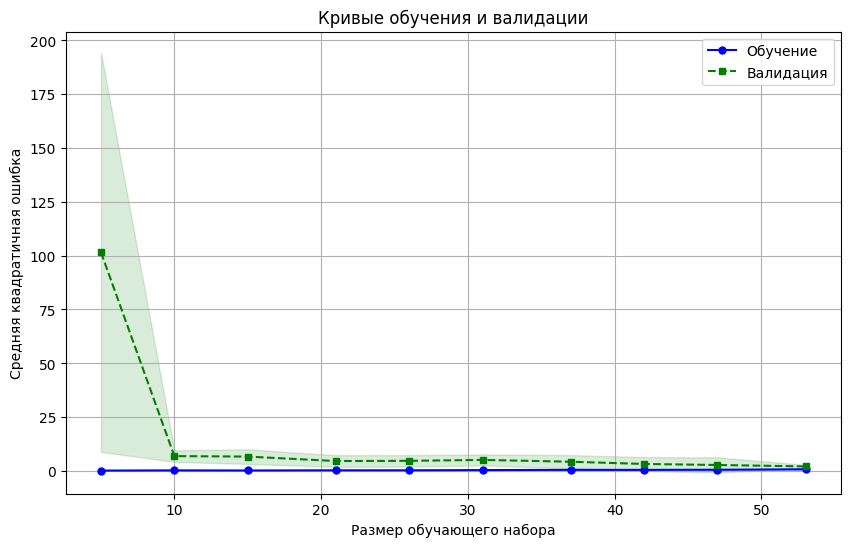

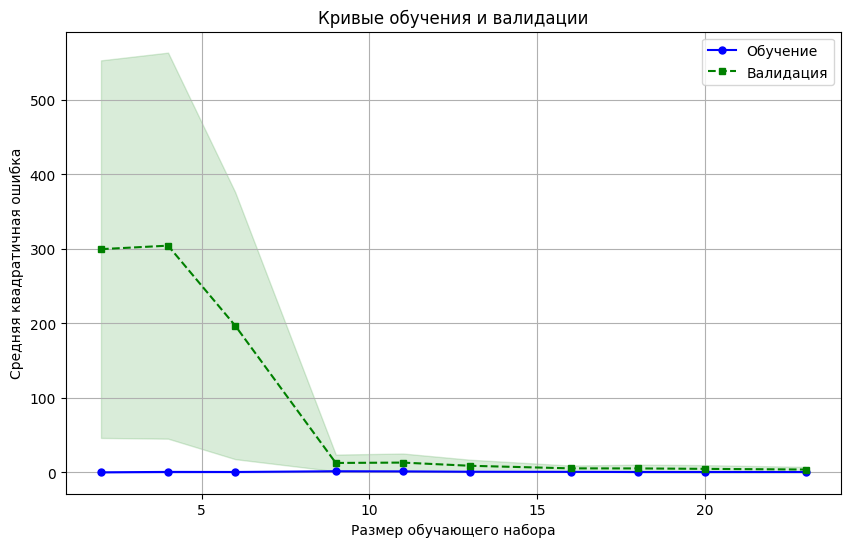

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor, Pool

# Замените LinearRegression() на вашу модель, если у вас другая модель
model = CatBoostRegressor(iterations=150, depth=3, learning_rate=0.1, loss_function='RMSE', l2_leaf_reg=5, border_count=32, verbose=0)

# Создайте функцию для построения кривых обучения и валидации
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

    # Вычислите средние и стандартные отклонения для кривых обучения и валидации
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Постройте кривые обучения и валидации
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Валидация')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

    # Настройте внешний вид графика
    plt.title('Кривые обучения и валидации')
    plt.xlabel('Размер обучающего набора')
    plt.ylabel('Средняя квадратичная ошибка')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

# Замените X и y на ваши данные
plot_learning_curve(model, train_data, train_y)
plot_learning_curve(model, val_data, val_y)


MAE на обучающих данных: 0.6316107938946377
MAE на валидационных данных: 1.3216544872573963


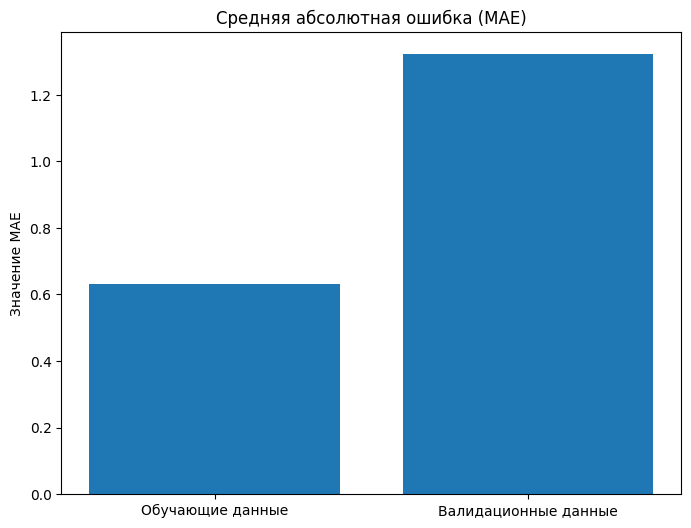

In [ ]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

mae_train = mean_absolute_error(train_y, cat.predict(train_data))
mae_val = mean_absolute_error(val_y, predictions)

print("MAE на обучающих данных:", mae_train)
print("MAE на валидационных данных:", mae_val)

# Создайте график
plt.figure(figsize=(8, 6))
plt.bar(['Обучающие данные', 'Валидационные данные'], [mae_train, mae_val])
plt.title('Средняя абсолютная ошибка (MAE)')
plt.ylabel('Значение MAE')
plt.show()

R-squared на обучающих данных: 0.9967571514904658
R-squared на валидационных данных: 0.9852104316230397


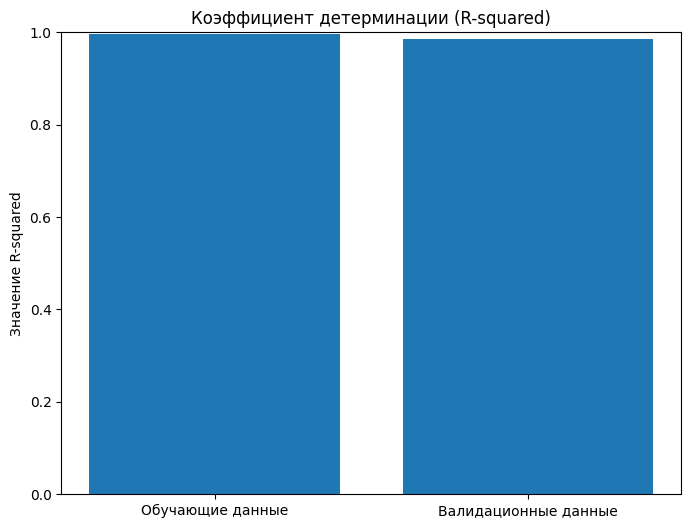

In [ ]:
from sklearn.metrics import r2_score

r2_train = r2_score(train_y, cat.predict(train_data))
r2_val = r2_score(val_y, predictions)

print("R-squared на обучающих данных:", r2_train)
print("R-squared на валидационных данных:", r2_val)
# Создайте график
plt.figure(figsize=(8, 6))
plt.bar(['Обучающие данные', 'Валидационные данные'], [r2_train, r2_val])
plt.title('Коэффициент детерминации (R-squared)')
plt.ylabel('Значение R-squared')
plt.ylim(0, 1)  # Установите предел для R-squared от 0 до 1
plt.show()

ВЫВОД: НАДО ДАННЫЕ НЕМНОГО ПОДТЯНУТЬ ИБО ЕСЛИ ХУЯРИТЬ СРЕДНЕЕ ЗНАЧЕНИЕ В ПУСТЫЕ КЛЕТКИ - ИНОГДА ОНО ХУЕВА УГАДЫВАЕТ

НИЖЕ ИДУТ ТОЛЬКО ТЕСТЫ ВСЯКИЕ

In [ ]:
import matplotlib.pyplot as plt

# Разделите данные на кластеры
clustered_data = df.groupby('Cluster')

# Создайте фигуру и подграфики
fig, axs = plt.subplots(num_clusters, 1, figsize=(8, 4*num_clusters))

# Проход по каждому кластеру и построение графика
for i, (name, group) in enumerate(clustered_data):
    ax = axs[i]
    ax.scatter(group['средняя температура'], group['Долгота'], label='Долгота', c='r', s=20)
    ax.scatter(group['средняя температура'], group['Широта'], label='Широта', c='g', s=20)
    ax.scatter(group['средняя температура'], group['Высота над уровнем моря'], label='Высота', c='b', s=20)
    ax.set_xlabel('Температура')
    ax.set_ylabel('Значение')
    ax.set_title(f'Кластер {name}')
    ax.legend()

# Расположите подграфики вертикально
plt.tight_layout()

# Отобразите график
plt.show()


NameError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

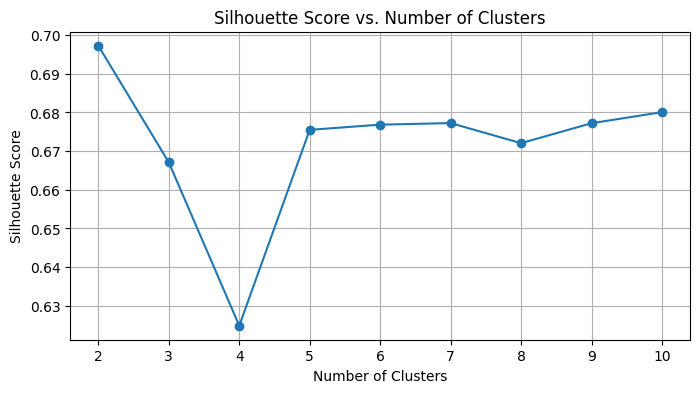

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Создайте список для сохранения значений Silhouette Score
silhouette_scores = []

# Определите диапазон количества кластеров, которые вы хотите проверить
num_clusters_range = range(2, 11)  # Пример: от 2 до 10 кластеров

# Пройдитесь по разным количествам кластеров и оцените Silhouette Score
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df[['Широта', 'Долгота']])
    silhouette_avg = silhouette_score(df[['Широта', 'Долгота']], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Постройте график Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [ ]:
lr = LinearRegression()
lr.fit(train_data, train_y)

# Предсказание на обучающих данных
predicted_train_y = lr.predict(train_data)
print("Предсказанные значения на обучающих данных:")
print(predicted_train_y)
print("Реальные значения на обучающих данных:")
print(train_y)

# Предсказание на валидационных данных
predicted_val_y = lr.predict(val_data)
print("Предсказанные значения на валидационных данных:")
print(predicted_val_y)
print("Реальные значения на валидационных данных:")
print(val_y)



Градиентный бустинг

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:

# Пример для задачи регрессии
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)


In [ ]:
gb_regressor.fit(train_data, train_y)    # Для регрессии

GradientBoostingRegressor()

In [ ]:
predictions = gb_regressor.predict(train_data)
print("Предсказанные значения на обучающих данных:")
print(predictions)
print("Реальные значения на обучающих данных:")
print(train_y)

predictions = gb_regressor.predict(val_data)
print("Предсказанные значения на валидационных данных:")
print(predictions)
print("Реальные значения на валидационных данных:")
print(val_y)


KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(train_data, train_y)

KNeighborsRegressor()

In [ ]:
predictions = knn_regressor.predict(train_data)
print("Предсказанные значения на обучающих данных:")
print(predictions)
print("Реальные значения на обучающих данных:")
print(train_y)

predictions = knn_regressor.predict(val_data)
print("Предсказанные значения на валидационных данных:")
print(predictions)
print("Реальные значения на валидационных данных:")
print(val_y)

In [ ]:
!pip install catboost

Кэт буст норм работает

НАДО СДЕЛАТЬ КЛАСТЕРИЗАЦИЮ ПО КООРДИНАТАМ!!!!

In [10]:
from catboost import CatBoostRegressor, Pool
cat = CatBoostRegressor(iterations=150, depth=3, learning_rate=0.1, loss_function='RMSE', l2_leaf_reg=5, border_count=32, verbose=0)




In [11]:
# Преобразование данных в catboost.Pool
train_pool = Pool(train_data, label=train_y)
val_pool = Pool(val_data, label=val_y)
cat.fit(train_data, train_y)
predictions = cat.predict(train_data)
print("Предсказанные значения на обучающих данных:")
print(predictions)
print("Реальные значения на обучающих данных:")
print(train_y)

predictions = cat.predict(val_data)
print("Предсказанные значения на валидационных данных:")
print(predictions)
print("Реальные значения на валидационных данных:")
print(val_y)

Предсказанные значения на обучающих данных:
[-22.83562228 -23.6813633   -3.37357099 -22.42451313 -51.37587355
 -10.54949219 -22.37206186 -13.06905656 -23.04570379 -18.32790177
  -5.63446675 -49.97298536 -16.48102548  -2.83077204 -20.18416878
 -40.66040827 -13.98339782  -2.13652254 -26.74693546 -42.10428789
 -28.56004924  -0.92188718 -18.14668381  -0.55494186 -26.61009295
  -1.62453491 -47.54712334  -9.52204737 -22.58991407 -23.56493664
 -16.04991942  -7.98186411  -1.52541496]
Реальные значения на обучающих данных:
Harry                        -23.225000
Elizabeth                    -24.245000
Bonaparte Parkpoint           -3.158824
Elaine                       -22.676923
Dome Fuji                    -52.280000
Maitri                       -10.145000
Ferrell                      -22.166667
D-10                         -13.650000
Minna Bluff                  -23.290000
Manuela                      -18.155556
Destacamento Naval            -6.200000
Dome C                       -50.300000


In [ ]:
from sklearn.model_selection import GridSearchCV
train_data, val_data, train_y, val_y = train_test_split(df, y, test_size = 0.3)
scaler = StandardScaler().fit(train_data)
standardized_X = scaler.transform(train_data)
train_pool = Pool(train_data, label=train_y)
val_pool = Pool(val_data, label=val_y)
cat = CatBoostRegressor()

# Задайте сетку параметров для перебора
param_grid = {
    'iterations': [250, 150, 200],
    'depth': [3, 4, 5],
    'learning_rate': [0.1, 0.15, 0,13],
    'l2_leaf_reg': [5, 7],
    'border_count': [32, 64, 128],
}

# Создайте объект GridSearchCV
grid_search = GridSearchCV(estimator=cat, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

# Выполните поиск по сетке параметров
grid_search.fit(train_data, train_y)  # Где X - ваши признаки, y - целевая переменная

# Выведите наилучшие параметры
best_params = grid_search.best_params_
print("Наилучшие параметры:", best_params)

# Выведите наилучший RMSE
best_rmse = (-grid_search.best_score_)**0.5
print("Наилучший RMSE:", best_rmse)

Support for third party widgets will remain active for the duration of the session. To disable support:

MAE на обучающих данных: 0.6670001231780661
MAE на валидационных данных: 2.2537445872913895


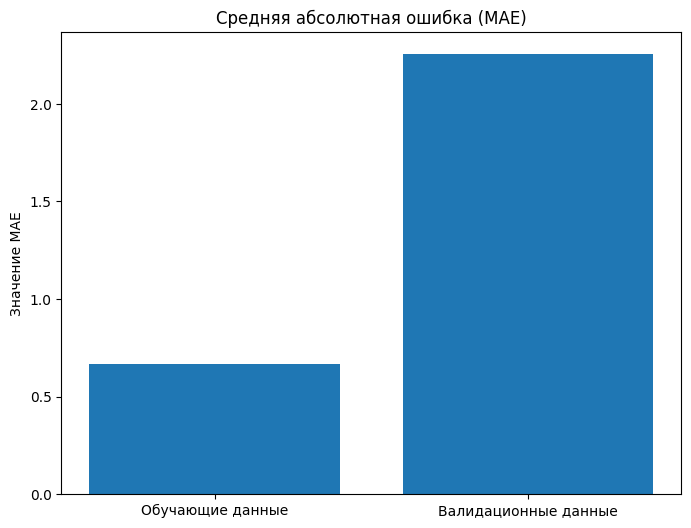

In [ ]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

mae_train = mean_absolute_error(train_y, cat.predict(train_data))
mae_val = mean_absolute_error(val_y, predictions)

print("MAE на обучающих данных:", mae_train)
print("MAE на валидационных данных:", mae_val)

# Создайте график
plt.figure(figsize=(8, 6))
plt.bar(['Обучающие данные', 'Валидационные данные'], [mae_train, mae_val])
plt.title('Средняя абсолютная ошибка (MAE)')
plt.ylabel('Значение MAE')
plt.show()


R-squared на обучающих данных: 0.9964377391895544
R-squared на валидационных данных: 0.9564514362323302


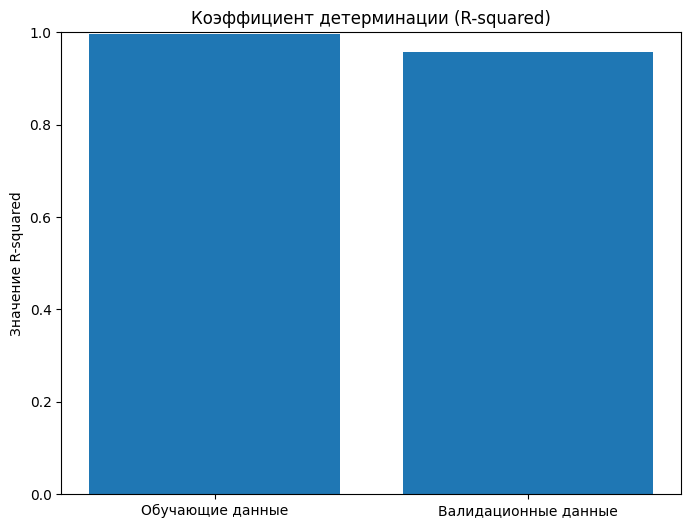

In [ ]:
from sklearn.metrics import r2_score

r2_train = r2_score(train_y, cat.predict(train_data))
r2_val = r2_score(val_y, predictions)

print("R-squared на обучающих данных:", r2_train)
print("R-squared на валидационных данных:", r2_val)
# Создайте график
plt.figure(figsize=(8, 6))
plt.bar(['Обучающие данные', 'Валидационные данные'], [r2_train, r2_val])
plt.title('Коэффициент детерминации (R-squared)')
plt.ylabel('Значение R-squared')
plt.ylim(0, 1)  # Установите предел для R-squared от 0 до 1
plt.show()


In [ ]:
import folium
import pandas as pd

m = folium.Map(location=[0, 0], zoom_start=2)
# Задайте координаты (широта и долгота) точки
df = pd.read_excel('Средняя и коорды.xlsx', sheet_name='Лист1')
# print(df["Долгота"], df["Широта"])
points = []
for i in range(len(df["станция"])):
    df['станция'][i] = df["станция"][i].replace('`', "\`")
    points.append({"name": df["станция"][i], "latitude": df["Широта"][i], "longitude": df["Долгота"][i], "temperature": df["средняя температура"][i]})
print(points)
# Создайте объект карты
for point in points:
    tooltip_text = f"{point['name']} (Средняя температура: {point['temperature']}°C)"
    folium.Marker([point["latitude"], point["longitude"]], tooltip=tooltip_text).add_to(m)
# Отобразите карту в браузере
m.save('map.html')  # Сохраните карту в HTML-файл и откройте его в браузере


[{'name': 'Ago-4', 'latitude': -82.02, 'longitude': 96.77, 'temperature': -52.6}, {'name': 'Baia Terra Nova', 'latitude': -74.7, 'longitude': 164.1, 'temperature': -14.1}, {'name': 'Baldrick Aws', 'latitude': -82.77, 'longitude': -13.05, 'temperature': -38.0}, {'name': 'Base Brown', 'latitude': -64.88, 'longitude': -62.88, 'temperature': -2.6}, {'name': 'Base Roi Baudouin', 'latitude': -70.4, 'longitude': 24.3, 'temperature': -15.8}, {'name': 'Bonaparte Parkpoint', 'latitude': -64.78, 'longitude': -63.07, 'temperature': -2.8}, {'name': 'Byrd Station', 'latitude': -80.02, 'longitude': -119.53, 'temperature': -27.7}, {'name': 'Byrd АМС', 'latitude': -80.0, 'longitude': -119.4, 'temperature': -27.1}, {'name': 'Мыс Филлипс', 'latitude': -73.51, 'longitude': 169.75, 'temperature': -16.9}, {'name': 'Мыс Росс', 'latitude': -76.71, 'longitude': 162.96, 'temperature': -15.4}, {'name': 'База капитана Артуро Прата', 'latitude': -62.5, 'longitude': -59.68, 'temperature': -2.3}, {'name': 'Карлини',

<ipython-input-11-a732bf17be99>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['станция'][i] = df["станция"][i].replace('`', "\`")


In [ ]:
a = "`"
a = a.replace("`", "\`")
print(a)

\`
